# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [7]:
df.describe().T

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

In [8]:
df["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

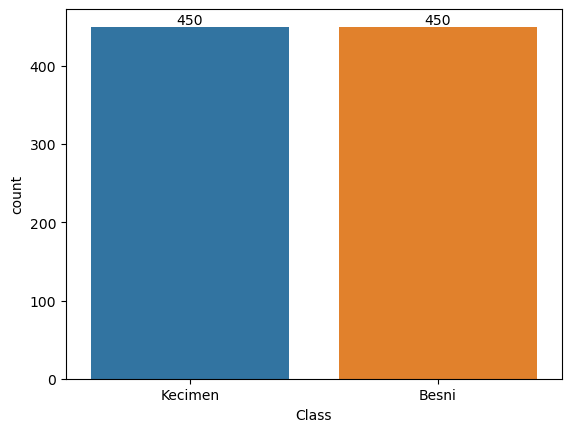

In [9]:
ax = sns.countplot(data = df, x = "Class")
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
# target değişken dengeli dağılmış 

In [11]:
# Target değişkenine nümeric dönüşüm gerçekleştirelim
df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})

In [12]:
df.sample(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
472  108161       485.102646       286.033191      0.807670      111765   
478  128947       572.801602       289.022169      0.863367      132108   
876  119336       563.546326       275.355769      0.872501      125523   
138   53758       359.531612       193.400877      0.842993       57197   
234   49715       302.347391       213.364511      0.708517       52250   

       Extent  Perimeter  Class  
472  0.707906   1305.144      1  
478  0.604409   1446.923      1  
876  0.668156   1469.764      1  
138  0.710295    965.068      0  
234  0.650107    877.430      0

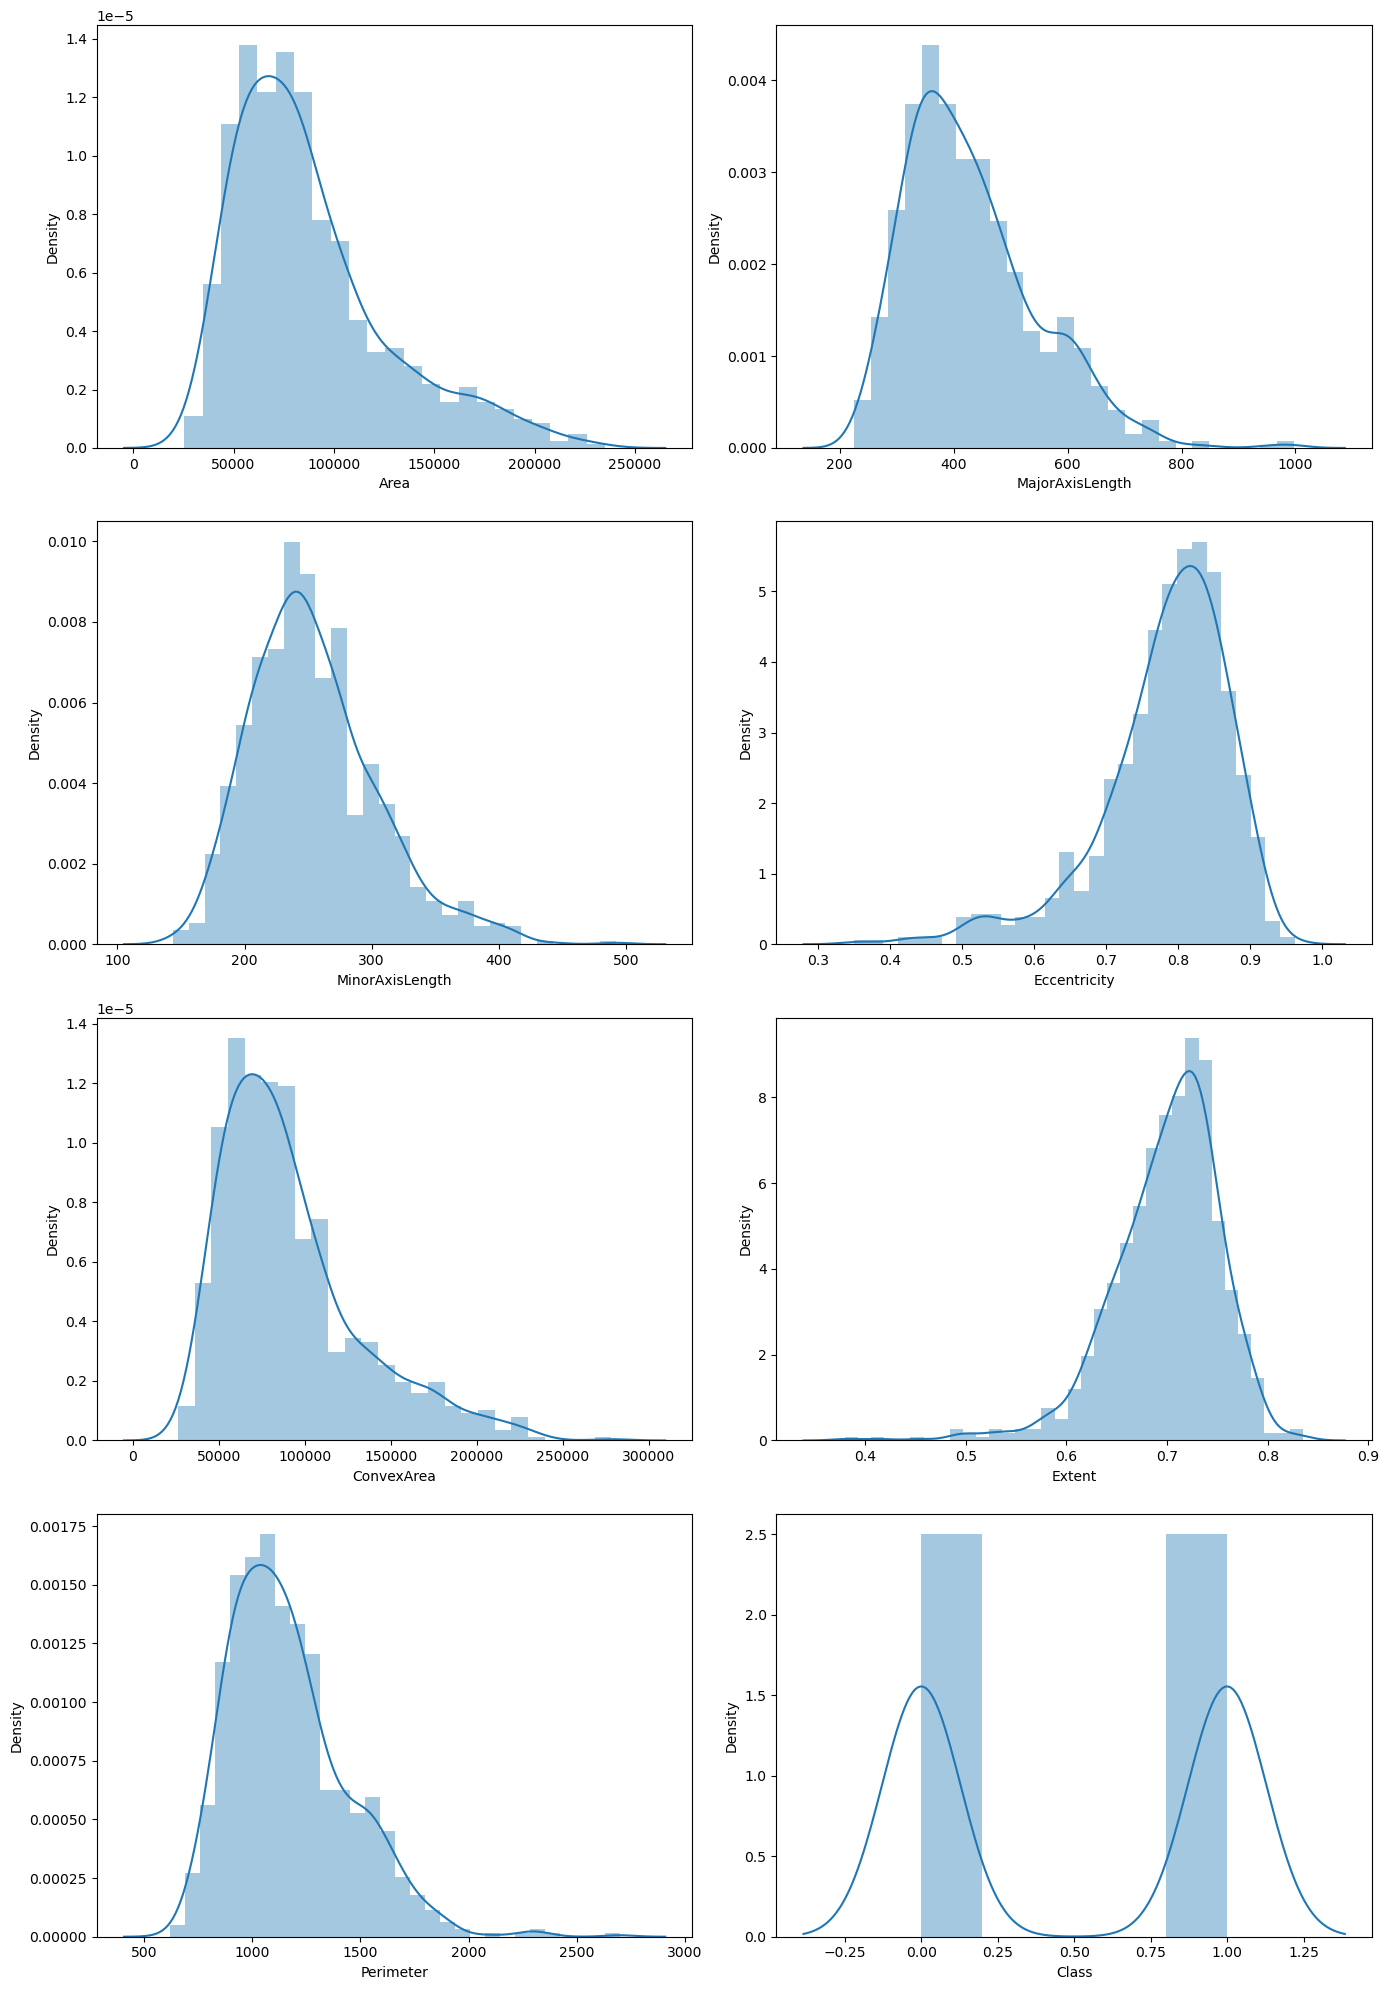

In [13]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(4, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

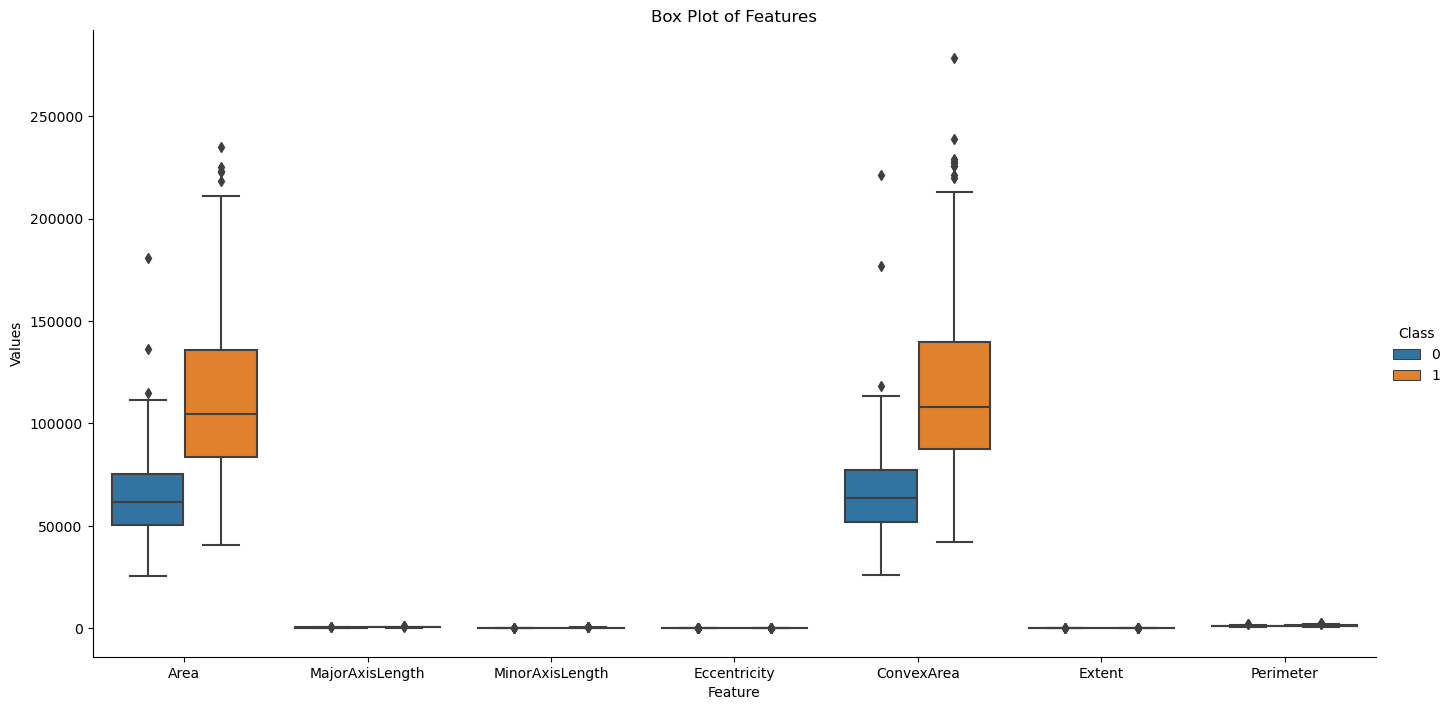

In [14]:
# pd.melt() fonksiyonu, geniş formatlı bir veri çerçevesini uzun formatlı bir veri çerçevesine dönüştürmek için kullanılır
# Yani Sütunları arda arda tek bir dataframe de topluyoruz 
data_to_plot = df.melt(id_vars='Class', value_vars=df.columns[:-1])

# Boxplot 1. yol 
sns.catplot(data=data_to_plot, x="variable", y="value", hue="Class", kind="box", height=7, aspect=2)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features')

# Display the plot
plt.show()

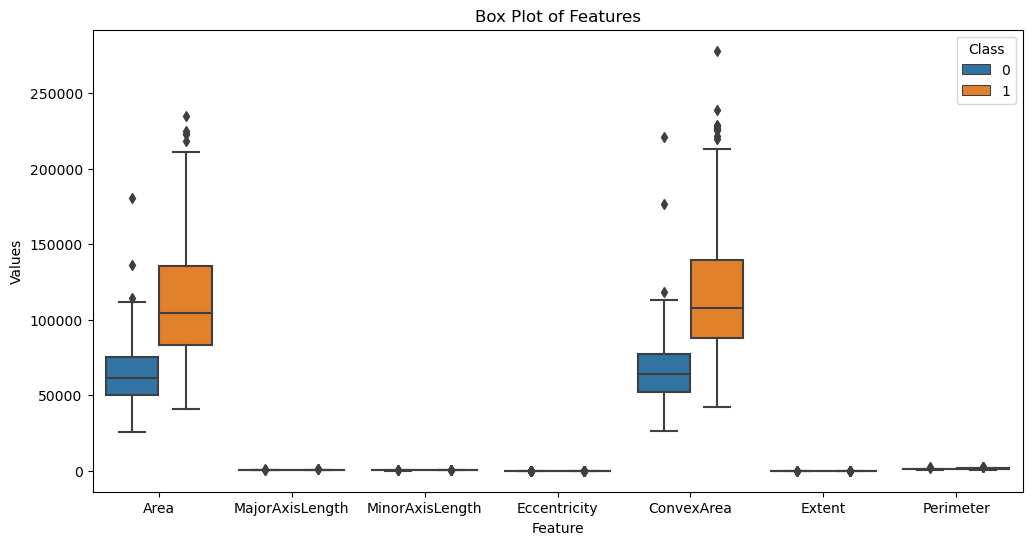

In [15]:
# Boxplot 2. yol 
plt.figure(figsize = (12,6))
sns.boxplot(x = "variable", y = "value", hue = "Class", data= data_to_plot)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

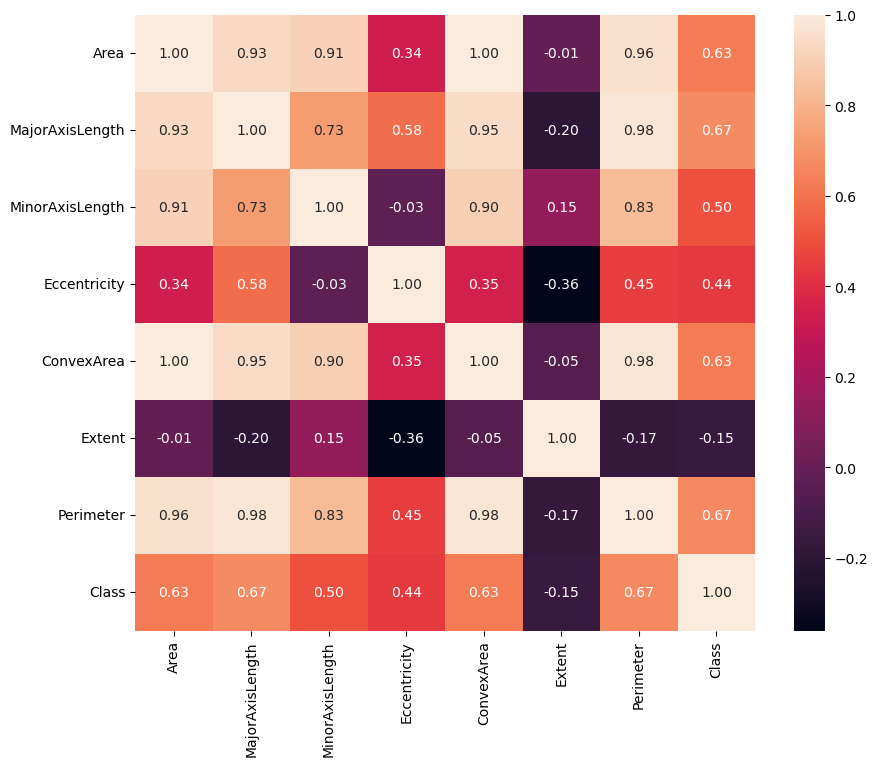

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), annot = True, fmt = '.2f')
plt.show()

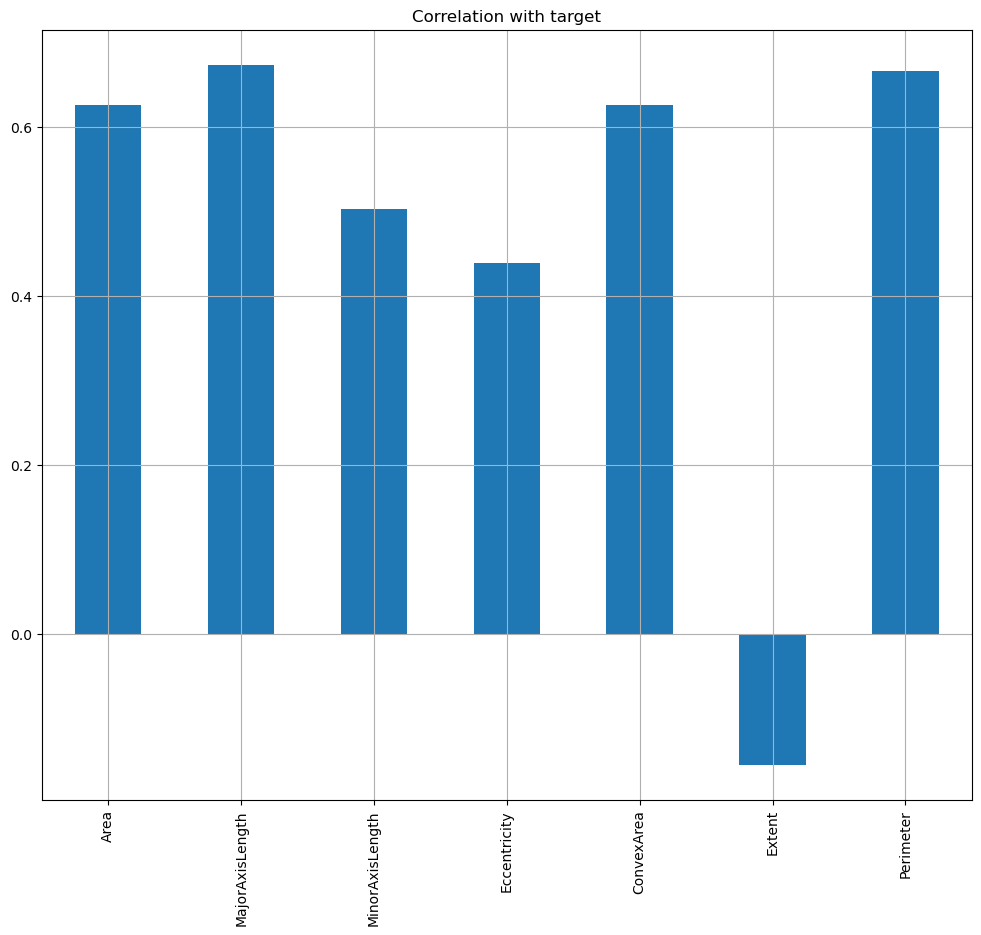

In [17]:
# Correlation with target
df.drop('Class', axis=1).corrwith(df.Class).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target");

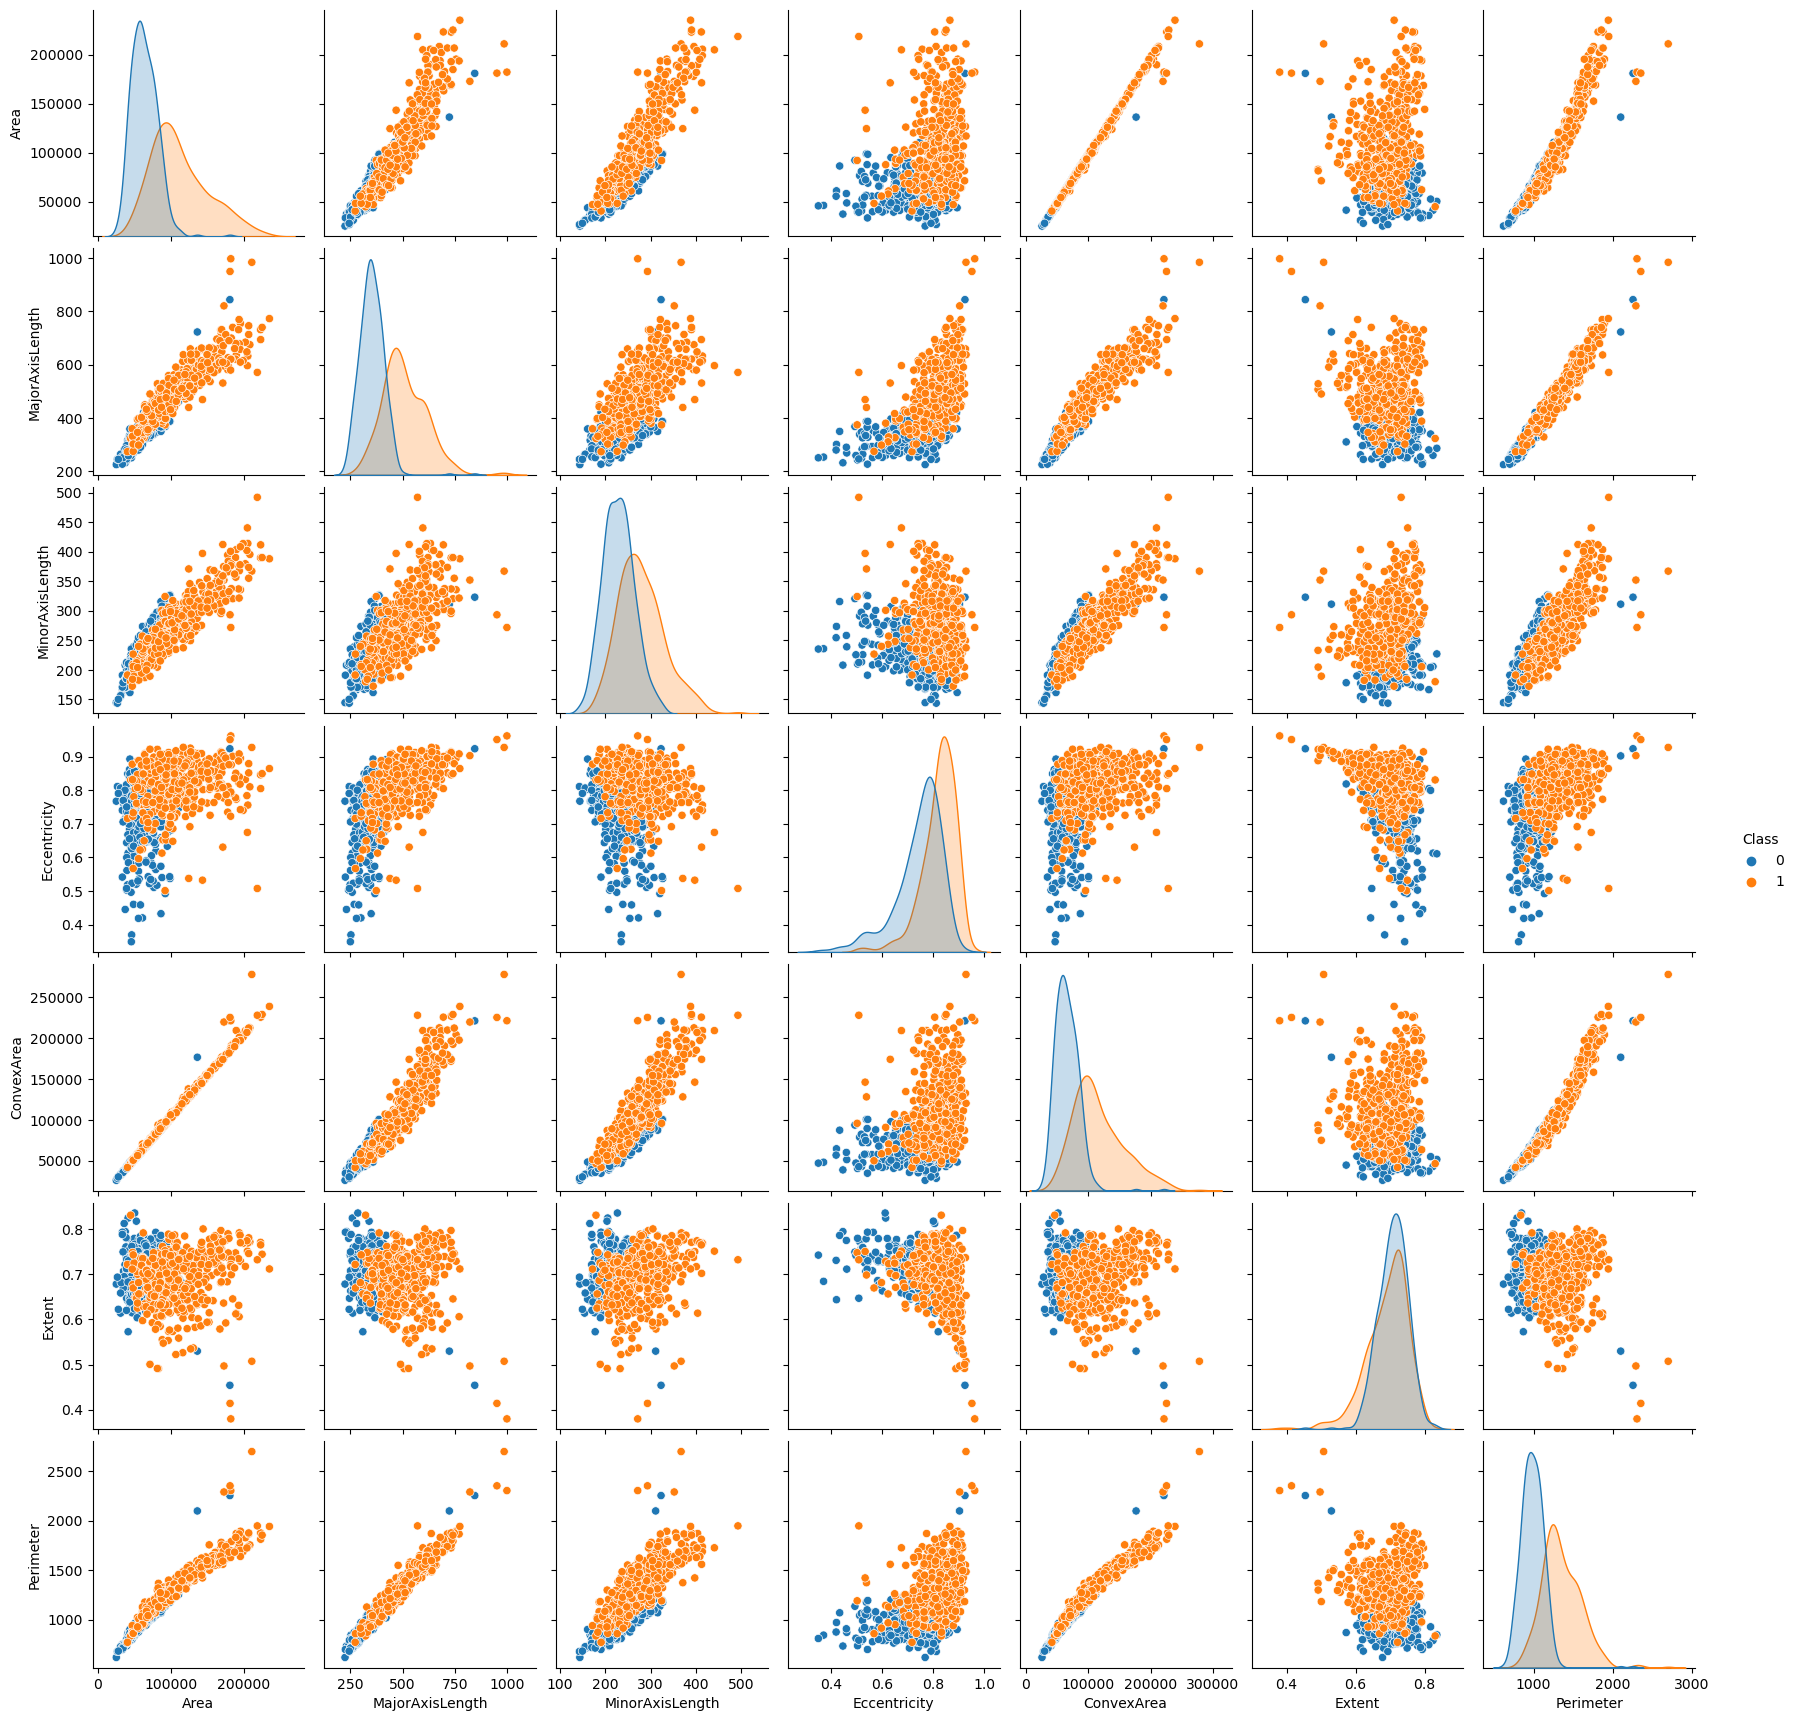

In [18]:
sns.pairplot(df, hue = "Class")
plt.show()

In [19]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

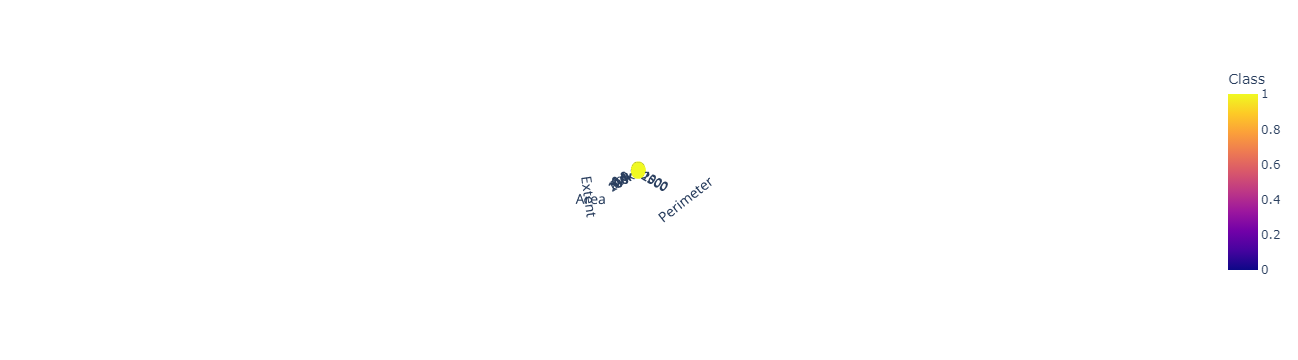

In [20]:
fig = px.scatter_3d(df, x = 'Perimeter', y = 'Area', z = 'Extent', color = 'Class')
fig.show()

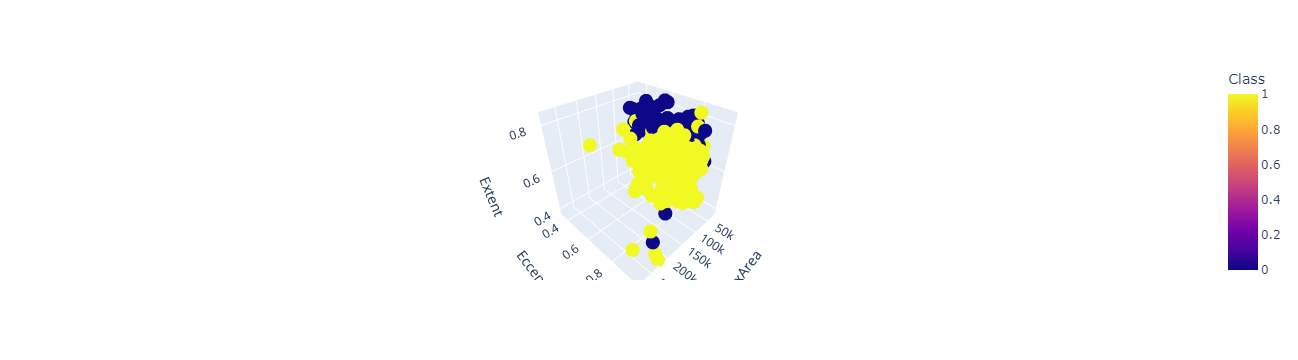

In [21]:
fig = px.scatter_3d(df, x = 'ConvexArea', y = 'Eccentricity', z = 'Extent', color = 'Class')
fig.show()

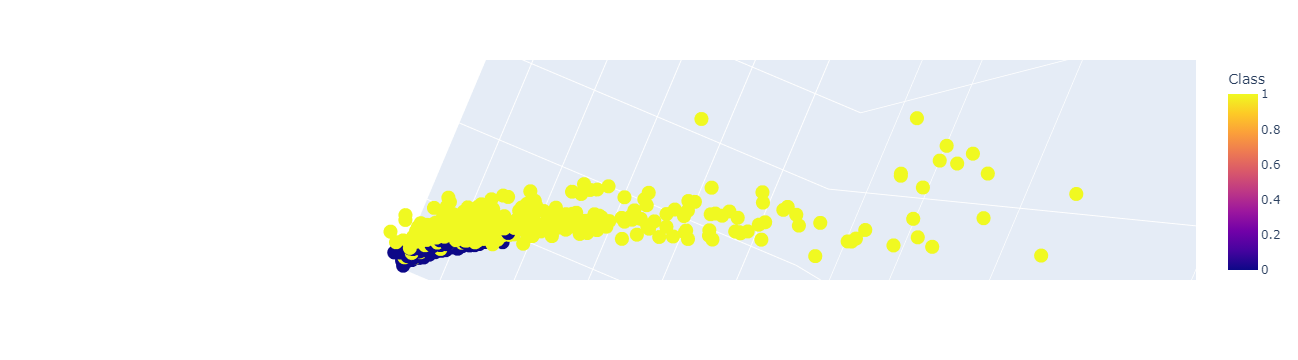

In [22]:
fig = px.scatter_3d(df, x = 'ConvexArea', y = 'Perimeter', z = 'MajorAxisLength', color = 'Class')
fig.show()

* Yukarıda ki 3 boyutlu grafikleri çizdirirken sütun seçiminde kendi aralarında daha az korelasyon olarlar seçilirse grafikten target değişkenin ayrımı daha net görülüyor
* Tam tersi bir durumda sütunlar arasında ilişki yüksek olduğundan target sınıfları daha iç içe geçmiş olduğu görülüyor

## Train | Test Split and Scaling

In [13]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [17]:
log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
log_model.coef_

array([[ 0.59499019,  0.59764493, -0.3278488 ,  0.34005073,  0.18518867,
        -0.18606934,  1.85593329]])

In [19]:
log_model.intercept_

array([0.49670518])

In [20]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

In [21]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.22491279e-01, 7.77508721e-01],
       [7.75253213e-01, 2.24746787e-01],
       [9.79163695e-01, 2.08363054e-02],
       [4.08436295e-02, 9.59156370e-01],
       [9.77872377e-01, 2.21276226e-02],
       [5.23348404e-01, 4.76651596e-01],
       [9.84225656e-01, 1.57743439e-02],
       [4.84816531e-01, 5.15183469e-01],
       [6.59357758e-01, 3.40642242e-01],
       [6.58939542e-01, 3.41060458e-01],
       [2.69265792e-01, 7.30734208e-01],
       [2.67269846e-02, 9.73273015e-01],
       [1.16910299e-02, 9.88308970e-01],
       [8.01577900e-01, 1.98422100e-01],
       [1.56067163e-03, 9.98439328e-01],
       [6.23821092e-03, 9.93761789e-01],
       [3.58130951e-01, 6.41869049e-01],
       [9.89458182e-01, 1.05418180e-02],
       [6.25731375e-01, 3.74268625e-01],
       [2.93910459e-01, 7.06089541e-01],
       [8.30680222e-01, 1.69319778e-01],
       [6.18664446e-03, 9.93813356e-01],
       [9.20970758e-01, 7.90292424e-02],
       [8.92049635e-01, 1.07950365e-01],
       [9.584754

In [22]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70    95347       451.526154       280.226153      0.784111       99256   
827   61861       345.943650       235.430468      0.732706       67390   
231   52693       283.504239       242.113954      0.520265       54860   
588  112808       542.504780       267.201878      0.870293      116961   
39    49882       287.264327       222.185873      0.633852       50880   
..      ...              ...              ...           ...         ...   
897   99657       431.706981       298.837323      0.721684      106264   
578  129038       540.814829       306.817764      0.823494      134796   
779  103915       516.485501       260.105445      0.863933      106499   
25    75620       368.224284       263.459255      0.698627       77493   
84    77587       396.807566       251.944920      0.772570       79970   

       Extent  Perimeter  Class  
70   0.674956   1255.245      0  
827  0.702280   1063.621      1  
231  0.737749    895.745      0  
588  0.743155   1390.400      1  
39   0.766378    843.764      0  
..        ...        ...    ...  
897  0.741099   1292.828      1  
578  0.648758   1459.345      1  
779  0.691085   1285.063      1  
25   0.726277   1059.186      0  
84   0.703865   1100.836      0  

[180 rows x 8 columns]

In [23]:
# Burada 0.5 ve üzerindeki olasılıkları 1 classına,
#        0.5 ve altındakileri de 0 classına atar.

test_data["pred_proba"] = y_pred_proba[:,1]
test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70    95347       451.526154       280.226153      0.784111       99256   
827   61861       345.943650       235.430468      0.732706       67390   
231   52693       283.504239       242.113954      0.520265       54860   
588  112808       542.504780       267.201878      0.870293      116961   
39    49882       287.264327       222.185873      0.633852       50880   
..      ...              ...              ...           ...         ...   
897   99657       431.706981       298.837323      0.721684      106264   
578  129038       540.814829       306.817764      0.823494      134796   
779  103915       516.485501       260.105445      0.863933      106499   
25    75620       368.224284       263.459255      0.698627       77493   
84    77587       396.807566       251.944920      0.772570       79970   

       Extent  Perimeter  Class  pred_proba  
70   0.674956   1255.245      0    0.777509  
827  0.702280   1063.621      1    0.224747  
231  0.737749    895.745      0    0.020836  
588  0.743155   1390.400      1    0.959156  
39   0.766378    843.764      0    0.022128  
..        ...        ...    ...         ...  
897  0.741099   1292.828      1    0.715831  
578  0.648758   1459.345      1    0.978765  
779  0.691085   1285.063      1    0.910842  
25   0.726277   1059.186      0    0.215929  
84   0.703865   1100.836      0    0.403117  

[180 rows x 9 columns]

In [24]:
test_data["pred"] = y_pred
test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70    95347       451.526154       280.226153      0.784111       99256   
827   61861       345.943650       235.430468      0.732706       67390   
231   52693       283.504239       242.113954      0.520265       54860   
588  112808       542.504780       267.201878      0.870293      116961   
39    49882       287.264327       222.185873      0.633852       50880   
..      ...              ...              ...           ...         ...   
897   99657       431.706981       298.837323      0.721684      106264   
578  129038       540.814829       306.817764      0.823494      134796   
779  103915       516.485501       260.105445      0.863933      106499   
25    75620       368.224284       263.459255      0.698627       77493   
84    77587       396.807566       251.944920      0.772570       79970   

       Extent  Perimeter  Class  pred_proba  pred  
70   0.674956   1255.245      0    0.777509     1  
827  0.702280   1063.621      1    0.224747     0  
231  0.737749    895.745      0    0.020836     0  
588  0.743155   1390.400      1    0.959156     1  
39   0.766378    843.764      0    0.022128     0  
..        ...        ...    ...         ...   ...  
897  0.741099   1292.828      1    0.715831     1  
578  0.648758   1459.345      1    0.978765     1  
779  0.691085   1285.063      1    0.910842     1  
25   0.726277   1059.186      0    0.215929     0  
84   0.703865   1100.836      0    0.403117     0  

[180 rows x 10 columns]

In [37]:
# 0-1 sınıflarını kaçta kaç bulmuş:

test_data.groupby("Class")[["pred"]].value_counts(normalize = True)

Class  pred
0      0       0.840426
       1       0.159574
1      1       0.872093
       0       0.127907
dtype: float64

## Model Performance

In [38]:
accuracy_score(y_test,y_pred)

0.8555555555555555

In [25]:
confusion_matrix(y_test, y_pred)

array([[79, 15],
       [11, 75]], dtype=int64)

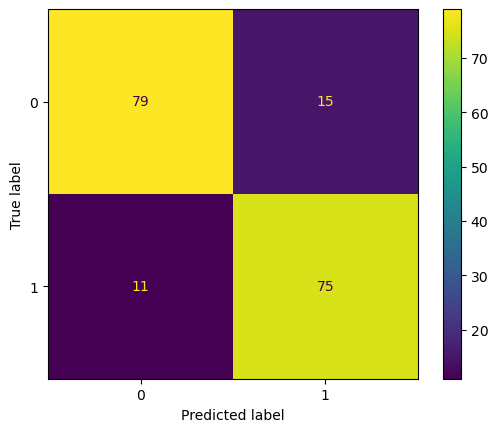

In [29]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 56 308]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [34]:
model = LogisticRegression()
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.075958    0.024983       0.847222        0.820513     0.888889  0.853333
2   0.049031    0.015049       0.875000        0.935484     0.805556  0.865672
3   0.095111    0.016509       0.819444        0.810811     0.833333  0.821918
4   0.066955    0.018985       0.944444        0.970588     0.916667  0.942857
5   0.092943    0.015990       0.861111        0.906250     0.805556  0.852941
6   0.026983    0.012990       0.888889        0.868421     0.916667  0.891892
7   0.030980    0.006994       0.777778        0.818182     0.729730  0.771429
8   0.022987    0.007993       0.833333        0.878788     0.783784  0.828571
9   0.028979    0.011994       0.930556        0.921053     0.945946  0.933333
10  0.020987    0.010993       0.902778        0.968750     0.837838  0.898551

In [35]:
df_scores.mean()[2:]

test_accuracy     0.868056
test_precision    0.889884
test_recall       0.846396
test_f1           0.866050
dtype: float64

### GridSearchCV

In [36]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) 
class_weight= ["balanced", None] 
solver = ["liblinear"] 

param_grid = {"penalty": penalty,
              "C": [1],
              "class_weight": class_weight,
              "solver": solver} 

grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = 10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [37]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [38]:
grid_model.best_index_

0

In [39]:
grid_model.best_score_

0.8680555555555556

In [40]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

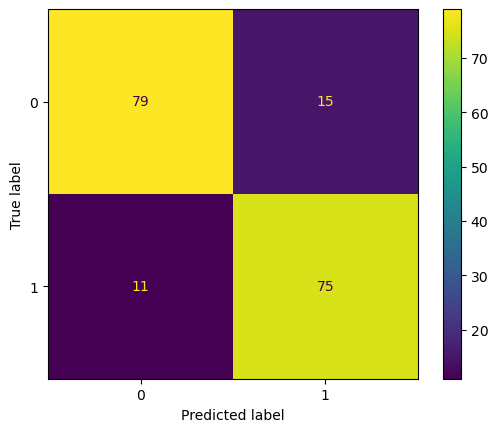

In [41]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [42]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 55 309]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

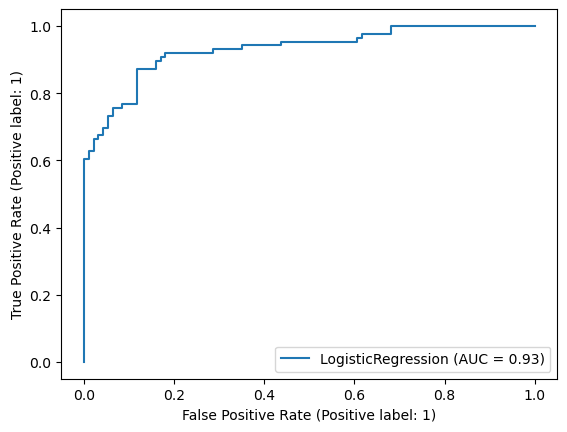

In [43]:
plot_roc_curve(log_model, X_test_scaled, y_test)

In [44]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9307273626917367

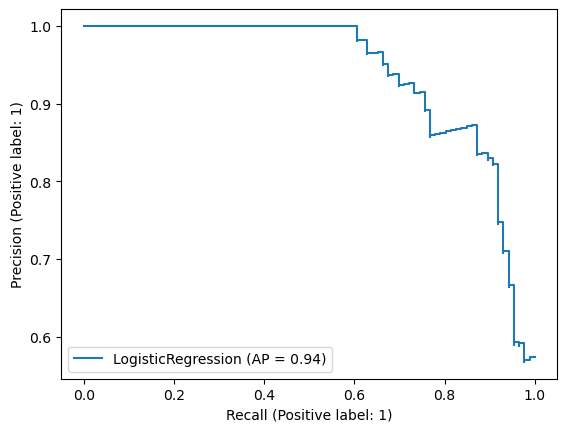

In [45]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

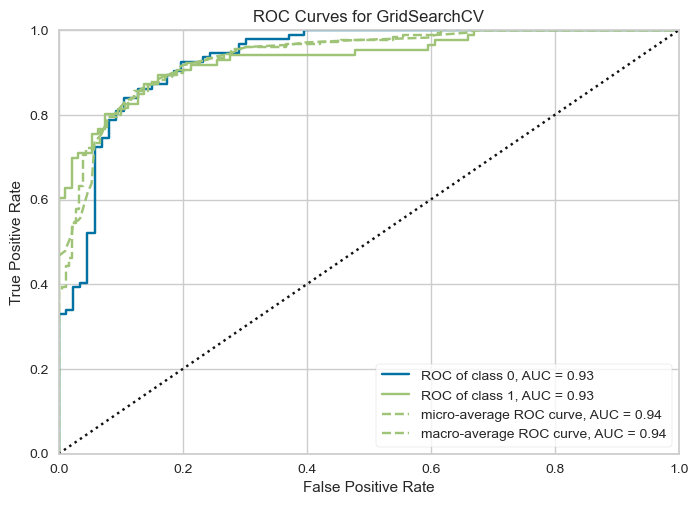

In [47]:
# Alternatif ROC gösterimi (yellowbrick)
from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

# Conclusion 

## Final Base Model

In [56]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [57]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb')) #scale modelimi kayıt ediyorum

In [58]:
X_scaled_raisin = scaler.transform(X) #sonra transform yapıyorum

In [59]:
final_model = LogisticRegression().fit(X_scaled_raisin, y)#final modelimi oluşturuyorum

In [60]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))#onuda kayıt ediyorum

## Pipeline Base Model

In [48]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

In [49]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [50]:
pipe_model = Pipeline(steps=operations)

In [51]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [52]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

### Changing the parameters of the pipeline model

In [53]:
pipe_model.get_params() 

# pipeline içerisindeki hiper-parametreleri getirir

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [54]:
pipe_model.set_params(logistic__penalty = "l1")

# Yukarıdaki listeden ihtiyaç duyulan parametre değişikliği yapar.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(penalty='l1'))])

## GridSearch & Pipeline

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "logistic__solver": ['liblinear'],
    "logistic__penalty": penalty,
     "logistic__C" : C
}

In [58]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [59]:
pipe_model = Pipeline(steps=operations)

In [60]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= "accuracy")

In [61]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear']},
             scoring='accuracy')

In [62]:
pipe_grid.best_params_

{'logistic__C': 0.8858667904100825,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [63]:
pipe_grid.best_score_ # accuracy

0.8680555555555556

## Pipeline Final Model

In [64]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression(C = 0.8858667904100825,
                                             penalty = 'l1',
                                             solver = 'liblinear'))]

# LogisticRegression içindeki hyperparametreleri pipe_grid.best_params_'dan aldık.

In [65]:
pipe_final = Pipeline(operations)

In [66]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.8858667904100825, penalty='l1',
                                    solver='liblinear'))])